In [63]:
import time
import json
import datetime
import pandas as pd 
import json
import os,sys
import numpy as np
import csv
from pandas.core.frame import DataFrame
import copy
import matplotlib.pyplot as plt
import nltk
import util
# from util import change_year_type, group_different, build_dic_function,build_group_dic,judge_success
import networkx as nx

In [52]:
Cen = pd.read_excel('closeness_centrality_advisory.xlsx')  
Cen.reset_index(drop=True, inplace=True)

In [53]:
yy = []
for i in range(2010,2020):
    yy.append(i)
def create_centrality_dic():
    tmp_year = list(Cen["year"])
    tmp_com = list(Cen["company"])
    tmp_cen = list(Cen["value"])
    dic = {}
    for tmp_yy in yy:
        dic[tmp_yy] = {}
    for i in range(len(Cen)):
        dic[tmp_year[i]][tmp_com[i]] = tmp_cen[i]
    return dic
        
cen_dic = create_centrality_dic()

In [54]:
print(cen_dic[2010]["54044-02"])

9.482268158543523e-05


In [7]:
Loc = pd.read_excel('CompanyLocationRelation.xlsx')
Loc.reset_index(drop=True, inplace=True)
Loc = Loc.loc[Loc["LocationType"] == "Primary HQ"]

In [6]:
Type = pd.read_excel('CompanyIndustryRelation.xlsx')
Type.reset_index(drop=True, inplace=True)
Type = Type.loc[Type["IsPrimary"] == "Yes"]

In [7]:
print(len(list(set(Type["IndustryGroup"]))))

41


['Healthcare', 'Financial Services', 'Energy', 'Information Technology', 'Materials and Resources', 'Consumer Products and Services (B2C)', 'Business Products and Services (B2B)']
Healthcare
Financial Services
Energy
Information Technology
Materials and Resources
Consumer Products and Services (B2C)
Business Products and Services (B2B)


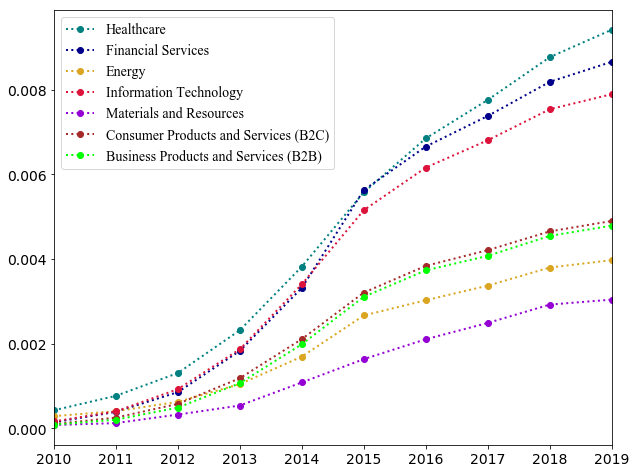

In [74]:
#https://www.jianshu.com/p/d0b789ba5be9
def calculate_average(target,target_list,com_list):
    target_company = []
    for i in range(len(com_list)):
        if pd.isnull(target_list[i]):
            continue
        if target_list[i] == target:
            target_company.append(com_list[i])
    every_year = []
    for year in yy:
        #year = 2012
        whole = []
        for tmp in target_company:
            if tmp not in foundyear_dic.keys():
                continue
            if foundyear_dic[tmp] > year:
                continue
            elif (foundyear_dic[tmp] <= year) & (tmp not in cen_dic[year].keys()):
                whole.append(0)
            else:
                whole.append(cen_dic[year][tmp])
        every_year.append(np.mean(whole))
    return every_year

def draw_graph(filename,need_plot,color_plot,target_list,com_list):
    DATA = []
    for each in need_plot:
        print(each)
        DATA.append(calculate_average(each,target_list,com_list))
    
    plt.figure(figsize=(10,8))#设置画布的尺寸
#     plt.title(filename,fontsize=20)

    #color：颜色，linewidth：线宽，linestyle：线条类型，label：图例，marker：数据点的类型
    for i in range(len(DATA)):
        data = DATA[i]
        plt.plot(yy,data,color=color_plot[i],linewidth=2,linestyle=':',label=need_plot[i], marker='o')
    
    font1 = {'family' : 'Times New Roman','weight' : 'normal','size'   : 14}
    plt.legend(loc=2,prop=font1)
    plt.tick_params(labelsize=14)
    plt.xlim(2010,2019)
    plt.savefig('Graph/'+filename+'.png',dpi=1200)
    plt.show()

whole_color = ["teal","darkblue","goldenrod","crimson","darkviolet","brown","lime","seagreen","indianred"]
# need_plot = ["California","New York","Massachusetts","Washington","Pennsylvania"]
# color_plot = ["lightsteelblue","darkblue","goldenrod","mediumpurple","teal"]
# draw_graph('Centrality Closeness (State)',need_plot,color_plot,list(Loc["State"]),list(Loc["CompanyID"]))

# # need_plot = ["San Francisco","Beijing","Berlin","Shanghai","Dublin","Shenzhen","Singapore","Boston","Cambridge"]
# # color_plot = whole_color[:len(need_plot)]
# # draw_graph('Centrality Closeness (City)',need_plot,color_plot,list(Loc["City"]),list(Loc["CompanyID"]))

need_plot = list(set(Type["IndustrySector"]))
print(need_plot)
color_plot = whole_color[:len(need_plot)]
draw_graph('Centrality Closeness (IndustrySector)',need_plot,color_plot,list(Type["IndustrySector"]),list(Type["CompanyID"]))

In [12]:
COM = pd.read_excel('Company.xlsx')  
COM.reset_index(drop=True, inplace=True)

In [13]:
foundyear_dic = util.build_dic_function(list(COM["CompanyID"]),list(COM["YearFounded"]),"None")  ####### company:foundyear

In [10]:
print('100033-84' in foundyear_dic.keys())

True


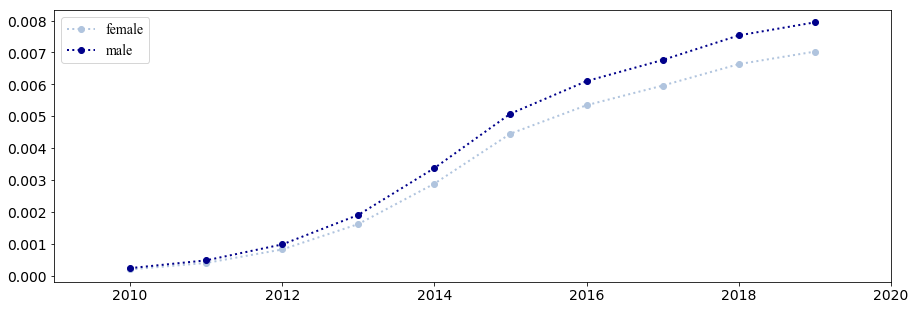

In [28]:
#https://www.jianshu.com/p/d0b789ba5be9
def calculate_average(target,target_list,com_list):
    target_company = []
    for i in range(len(com_list)):
        if pd.isnull(target_list[i]):
            continue
        if target_list[i] == target:
            target_company.append(com_list[i])
    every_year = []
    for year in yy:
        #year = 2012
        whole = []
        for tmp in target_company:
            if tmp not in foundyear_dic.keys():
                continue
            if foundyear_dic[tmp] > year:
                continue
            elif (foundyear_dic[tmp] <= year) & (tmp not in cen_dic[year].keys()):
                whole.append(0)
            else:
                whole.append(cen_dic[year][tmp])
        every_year.append(np.mean(whole))
    return every_year

def draw_graph(filename,need_plot,color_plot,target_list,com_list,label_plot):
    DATA = []
    for each in label_plot:
        DATA.append(calculate_average(each,target_list,com_list))
    
    plt.figure(figsize=(15,5))#设置画布的尺寸
#     plt.title(filename,fontsize=20)

    #color：颜色，linewidth：线宽，linestyle：线条类型，label：图例，marker：数据点的类型
    for i in range(len(DATA)):
        data = DATA[i]
        plt.plot(yy,data,color=color_plot[i],linewidth=2,linestyle=':',label=need_plot[i], marker='o')
    font1 = {'family' : 'Times New Roman','weight' : 'normal','size'   : 14}
    plt.legend(loc=2,prop=font1)
    plt.tick_params(labelsize=14)
    plt.xlim(2009,2020)
#     plt.savefig('Graph/'+filename+'.png',dpi=1200)
    plt.show()

whole_color = ["lightsteelblue","darkblue","goldenrod","mediumpurple","teal","tan","darkgrey","seagreen","indianred"]
# need_plot = ["has_MBA","no_MBA"]
# label_plot = [1,0]
# color_plot = whole_color[:len(need_plot)]
# draw_graph('Centrality Closeness (MBA)',need_plot,color_plot,list(COM["has_MBA"]),list(COM["CompanyID"]),label_plot)

need_plot = ["female","male"]
label_plot = [1,0]
color_plot = whole_color[:len(need_plot)]
draw_graph('Centrality Closeness (gender)',need_plot,color_plot,list(COM["has_female_member"]),list(COM["CompanyID"]),label_plot)

In [14]:
def calculate_dic():
    silicon_valley = ["Campbell","Cupertino", "Gilroy", "Los Altos", "Los Gatos", "Milpitas", "Morgan Hill", "Mountain View", "Palo Alto", "San Jose", "Santa Clara", "Saratoga", "Sunnyvale","San Francisco","Stanford","Redwood city","Menlo Park"]
    city_list = list(Loc["City"])
    com_list = list(Loc["CompanyID"])
    dic = {}
    for year in yy:
        dic[year] = {}
    for year in yy:
        dic[year]["Silicon Valley"],dic[year]["Boston"] = [],[]
        for i in range(len(com_list)):
            tmp_company = com_list[i]
            tmp_city = city_list[i]
            if (tmp_company not in foundyear_dic.keys()) or (foundyear_dic[tmp_company] > year):
                continue
            if (tmp_city not in dic[year].keys()) and (tmp_city not in silicon_valley) and (tmp_city != "Cambridge"):
                dic[year][tmp_city] = []
                
            if tmp_city in silicon_valley:
                if tmp_company not in cen_dic[year].keys():
                    dic[year]["Silicon Valley"].append(0)
                else:
                    dic[year]["Silicon Valley"].append(cen_dic[year][tmp_company])
            elif tmp_city == "Cambridge":
                if tmp_company not in cen_dic[year].keys():
                    dic[year]["Boston"].append(0)
                else:
                    dic[year]["Boston"].append(cen_dic[year][tmp_company])
            elif (foundyear_dic[tmp_company] <= year) & (tmp_company not in cen_dic[year].keys()):
                dic[year][tmp_city].append(0)
            else:
                dic[year][tmp_city].append(cen_dic[year][tmp_company])
    return dic
final_dic = calculate_dic()

In [15]:
final_dic2 = {}
for year in yy:
    final_dic2[year] = {}
    for key in final_dic[year].keys():
        final_dic2[year][key] = np.mean(final_dic[year][key])

In [16]:
print(final_dic2.keys())

dict_keys([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])


In [17]:
print(final_dic2[2019]["Silicon Valley"])

0.019322876302974742


In [19]:
year = 2010
kk = sorted(final_dic2[year].items(),key=lambda x: x[1],reverse = True)
for pair in kk:
#     if len(final_dic[year][pair[0]]) < 500:
#         continue
    print(pair[1])

0.014759361173728837
0.014667218531536519
0.014135469633833482
0.013592362285493046
0.012408737021466498
0.0122790289689773
0.009297424065602094
0.009060230808514648
0.008176522770525491
0.007771510955598695
0.007495591800270667
0.006566664045080316
0.0055896848564243925
0.004947414371841718
0.004480056432940966
0.004479180395312311
0.004469566544707738
0.00438171703784078
0.004350717671724056
0.004183267779140238
0.004158208040231841
0.003728731297216808
0.0037238036322709816
0.003718290486425965
0.0036833138031238393
0.0036161540917320446
0.0034870647802751034
0.003170501574822257
0.002882376398167126
0.0028817774545214225
0.002482922112434271
0.002305434098311599
0.002209988281874304
0.0021760849448109166
0.0021753041289019333
0.001971301939899067
0.001927506481786644
0.0018526217633263661
0.0018525034585101558
0.0017978676172912128
0.0016990452856866305
0.0016688692736341717
0.001652645695413934
0.0015891754712502055
0.001586908514136416
0.00151463425296489
0.0015089939750742526
0.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [55]:
def calculate_average(target):
    target_list = list(COM["has_MBA"])
    com_list = list(COM["CompanyID"])
#     target_list = COM["has_female_member"]
#     com_list = list(COM["CompanyID"])
    target_company = []
    for i in range(len(com_list)):
        if pd.isnull(target_list[i]):
            continue
        if target_list[i] == target:
            target_company.append(com_list[i])
#     print(target_company)
    year = 2019
    whole = []
    for tmp in target_company:
        if tmp not in foundyear_dic.keys():
            continue
        if foundyear_dic[tmp] > year:
            continue
        elif (foundyear_dic[tmp] <= year) & (tmp not in cen_dic[year].keys()):
            whole.append(0)
        else:
             whole.append(cen_dic[year][tmp])
    return whole,np.mean(whole)

# fenlei = ["has_MBA","no_MBA"]
fenlei = ["has_female","no_female"]
data1,avg1 = calculate_average(1)
data2,avg2 = calculate_average(0)

In [56]:
print(avg1,avg2)

0.014950420479528822 0.006387744060271045


In [47]:
import seaborn as sns
import scipy.stats
from scipy.stats import norm

def mean_confidence_interval(data, confidence=0.95):
    a,n,m,se,h = 0,0,0,0,0
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return h,m

[0 1]
(0.00022797397801866954, 0.007027662758757755) (0.00012181839909238181, 0.007945999609980587)


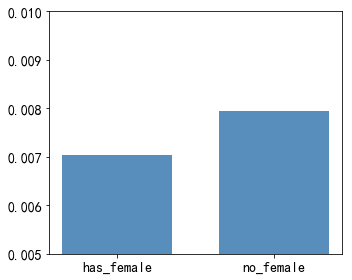

In [80]:
# x= ["has_MBA","no_MBA"]
x= ["has_female","no_female"]
y =  [avg1,avg2]
bar_width = 0.7
plt.figure(figsize=(5, 4))
plt.bar(x, y, bar_width,color="steelblue",alpha=0.9,label = "closeness centality")
plt.ylim(0.005, 0.01)
# plt.ylim(0.005, 0.017)

mo = 0
x_1 = np.arange(mo,mo+2)
print(x_1)
# x_2 = x_1 + 0.4
a1 = mean_confidence_interval(data1)
a2 = mean_confidence_interval(data2)
print(a1,a2)
y_1 = [a1[1],a2[1]]
err_1 = [a1[0],a2[0]]


# 绘制置信区间图 ,
# plt.errorbar(x=x_1, y=y_1, yerr=err_1, color="black", capsize=3,label = "95% CI",
#              linestyle="None", markersize=7, mfc="black", mec="black")
# plt.errorbar(x=x_2, y=y_2, yerr=err_2, color="black", capsize=3,
#              linestyle="None", markersize=7, mfc="black", mec="gray")
plt.tight_layout()
plt.tick_params(labelsize=14)

plt.xlabel("")
plt.ylabel("")

# plt.legend(loc='center',bbox_to_anchor=(0.45,-0.14),ncol = 2)
plt.tight_layout()

plt.savefig("Graph/female_bar.png",dpi=1200)
plt.show()


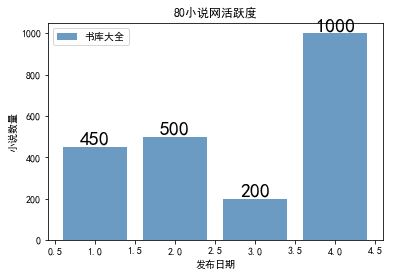

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
# 构建数据
x = [1, 2, 3, 4]
y = [450, 500, 200, 1000]
# 绘图
plt.bar(x=x, height=y, label='书库大全', color='steelblue', alpha=0.8)
# 在柱状图上显示具体数值, ha参数控制水平对齐方式, va控制垂直对齐方式
for x1, yy in zip(x, y):
    plt.text(x1, yy + 1, str(yy), ha='center', va='bottom', fontsize=20, rotation=0)
# 设置标题
plt.title("80小说网活跃度")
# 为两条坐标轴设置名称
plt.xlabel("发布日期")
plt.ylabel("小说数量")
# 显示图例
plt.legend()
plt.savefig("a.jpg")
plt.show()

In [27]:
tmp_cc = list(Loc["CompanyID"])
tmp_city = list(Loc["City"])
loc_dic = {}
silicon_valley = ["Campbell","Cupertino", "Gilroy", "Los Altos", "Los Gatos", "Milpitas", "Morgan Hill", "Mountain View", 
                  "Palo Alto", "San Jose", "Santa Clara", "Saratoga", "Sunnyvale","San Francisco","Stanford",
                 "Redwoodcity","San Mateo","South San Francisco","Redwood City","Menlo Park"]
for i in range(len(Loc)):
    cc = tmp_cc[i]
    city = tmp_city[i]
    if pd.isnull(city):
        continue
    if city in silicon_valley:
        city = "Silicon Valley"
    elif city in ["Cambridge","Waltham","Lexington","Boston"]:
        city = "Greater Boston"
    loc_dic[cc] = city

In [28]:
print(len(loc_dic))

168117


In [34]:
year = 2019
print(len(cen_dic[year]))
#cen_dic
kk = sorted(cen_dic[year].items(),key=lambda x: x[1],reverse = True)[:int(len(cen_dic[year])*0.1)]
location_list = []
for pair in kk:
    cc = pair[0]
    if cc not in loc_dic.keys():
        continue
    location_list.append(loc_dic[cc])

62898


In [35]:
print(len(kk))

6289


In [36]:
data_dict = {}
for key in location_list:
    data_dict[key] = data_dict.get(key,0) + 1

In [57]:
print(data_dict["Shenzhen"])

KeyError: 'Shenzhen'

In [38]:
kkk = sorted(data_dict.items(),key=lambda x:x[1],reverse = True)[:10]
for pair in kkk:
    print(pair[1])

1585
448
424
165
111
93
81
56
56
52


In [39]:
ww = pd.read_excel('foraccessingcompanyclosness.xlsx')  
ww.reset_index(drop=True, inplace=True)

In [40]:
ww = ww.loc[ww["DealNo"] == 1]

In [45]:
tmp = [item[1] for item in cen_dic[2010].items()]
print(np.median(tmp))

9.482268158543523e-05


In [47]:
median = {}
for key in cen_dic:
    median[key] = np.median([item[1] for item in cen_dic[2010].items()])

In [50]:
tmp_dd = list(ww["DealDate"])
tmp_cc = list(ww["CompanyID"])
tmp_ss = list(ww["success"])
big = []
small = []
for i in range(len(ww)):
    dd = util.change_year_type(tmp_dd[i])
    cc,ss = tmp_cc[i],tmp_ss[i]
    if dd<2010 or dd>2014:
        continue
    if cc not in cen_dic[dd].keys():
        continue
    if cen_dic[dd][cc] > median[dd]:
        big.append(ss)
    else:
        small.append(ss)
        
print(np.mean(big),np.mean(small))

0.2565913370998117 0.1809645753307725
